In [21]:
import os
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from pathlib import Path

# Initial Data Exploration

Let us look at what data we are dealing with, starting off with the features

In [4]:
df = pd.read_csv("data/train.csv")
df.head()

Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  
0          0      1        0      0          0     0     0           63  
1          0      0        0      0          0     0     0           42  
2          0      0        0      1          1     0     0           28  
3          0      0        0      0          0     0     0           15  
4          0      1        0      0          0     0     0           72

In [22]:
df.describe()

Subject Focus         Eyes         Face         Near       Action  \
count    9912.000000  9912.000000  9912.000000  9912.000000  9912.000000   
mean        0.027643     0.772599     0.903955     0.861582     0.009988   
std         0.163957     0.419175     0.294668     0.345356     0.099444   
min         0.000000     0.000000     0.000000     0.000000     0.000000   
25%         0.000000     1.000000     1.000000     1.000000     0.000000   
50%         0.000000     1.000000     1.000000     1.000000     0.000000   
75%         0.000000     1.000000     1.000000     1.000000     0.000000   
max         1.000000     1.000000     1.000000     1.000000     1.000000   

         Accessory        Group      Collage        Human    Occlusion  \
count  9912.000000  9912.000000  9912.000000  9912.000000  9912.000000   
mean      0.067797     0.129338     0.049637     0.166263     0.172014   
std       0.251409     0.335591     0.217204     0.372335     0.377411   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              Info         Blur  Pawpularity  
count  9912.000000  9912.000000  9912.000000  
mean      0.061239     0.070420    38.039044  
std       0.239780     0.255866    20.591990  
min       0.000000     0.000000     1.000000  
25%       0.000000     0.000000    25.000000  
50%       0.000000     0.000000    33.000000  
75%       0.000000     0.000000    46.000000  
max       1.000000     1.000000   100.000000

Lets check the distribution of pawpularity scores

c:\Users\q\Desktop\Programming\ML\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\q\Desktop\Programming\ML\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


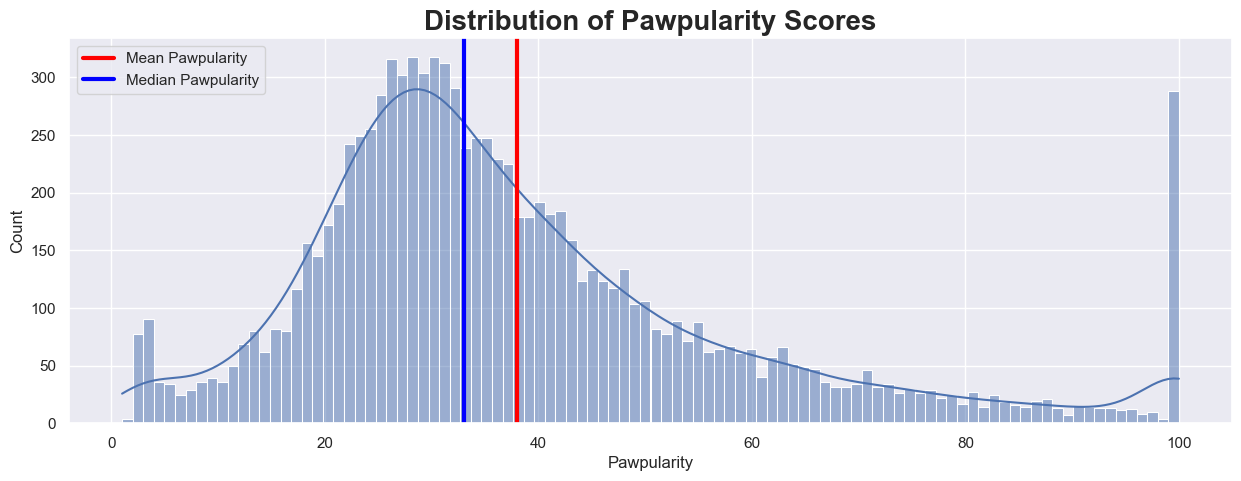

In [45]:
sns.set(rc={'figure.figsize':(15,5)})

fig = plt.figure()
sns.histplot(data=df, x='Pawpularity', kde=True, bins=100)

plt.axvline(df['Pawpularity'].mean(), c='red', ls='-', lw=3, label='Mean Pawpularity')
plt.axvline(df['Pawpularity'].median(),c='blue',ls='-',lw=3, label='Median Pawpularity')

plt.title('Distribution of Pawpularity Scores', fontsize=20, fontweight='bold')
plt.legend()
plt.show()

Pawpularity is left-skewed, and there is a big spike for 100, while there is a small spike for low values as well

In [41]:
df['Pawpularity'].describe()

count    9912.000000
mean       38.039044
std        20.591990
min         1.000000
25%        25.000000
50%        33.000000
75%        46.000000
max       100.000000
Name: Pawpularity, dtype: float64

Lets look at the distribution of pawpularity across features

c:\Users\q\Desktop\Programming\ML\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\q\Desktop\Programming\ML\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\q\Desktop\Programming\ML\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\q\Desktop\Programming\ML\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

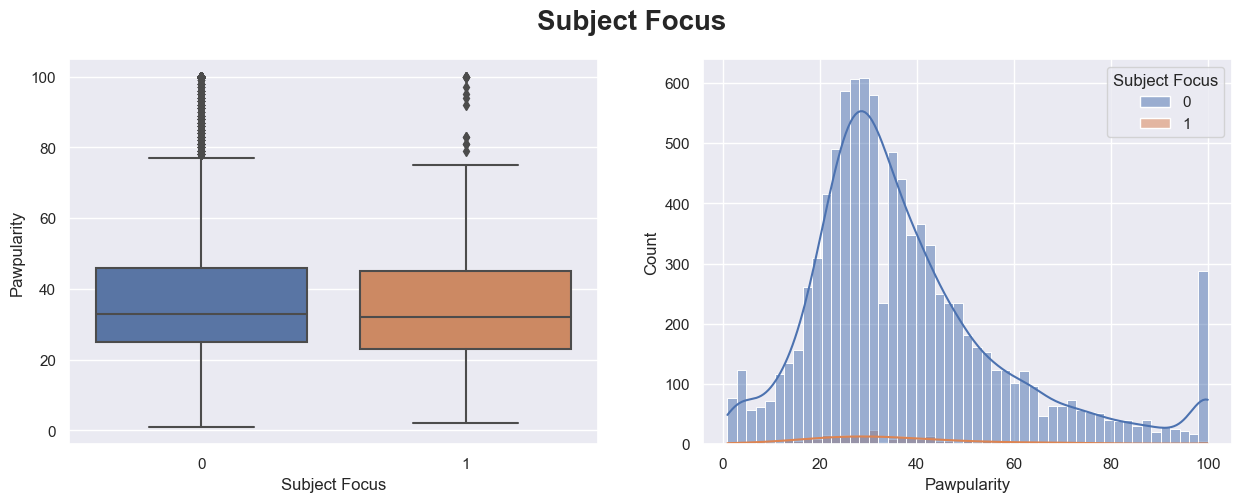

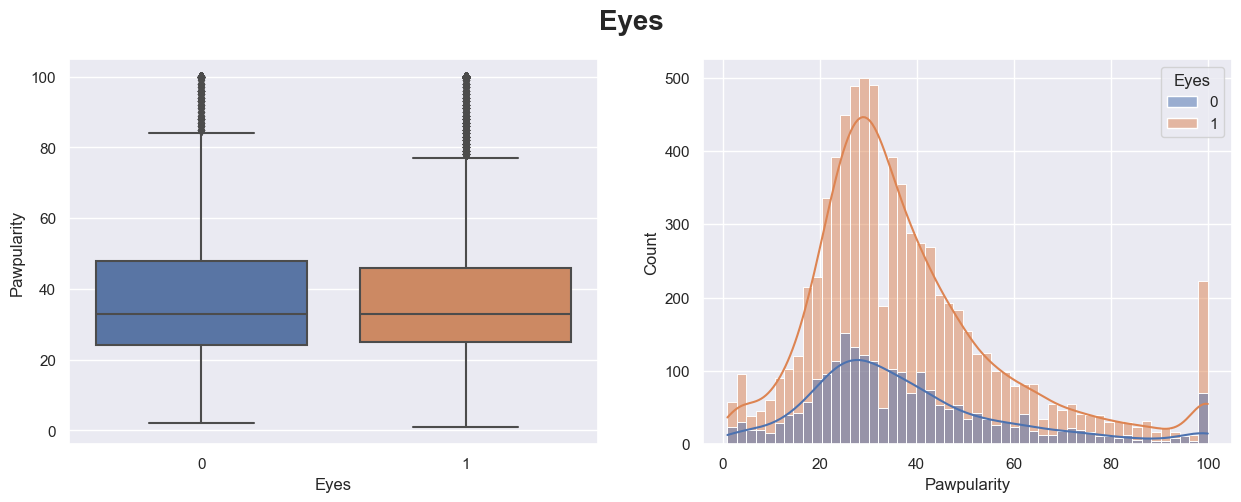

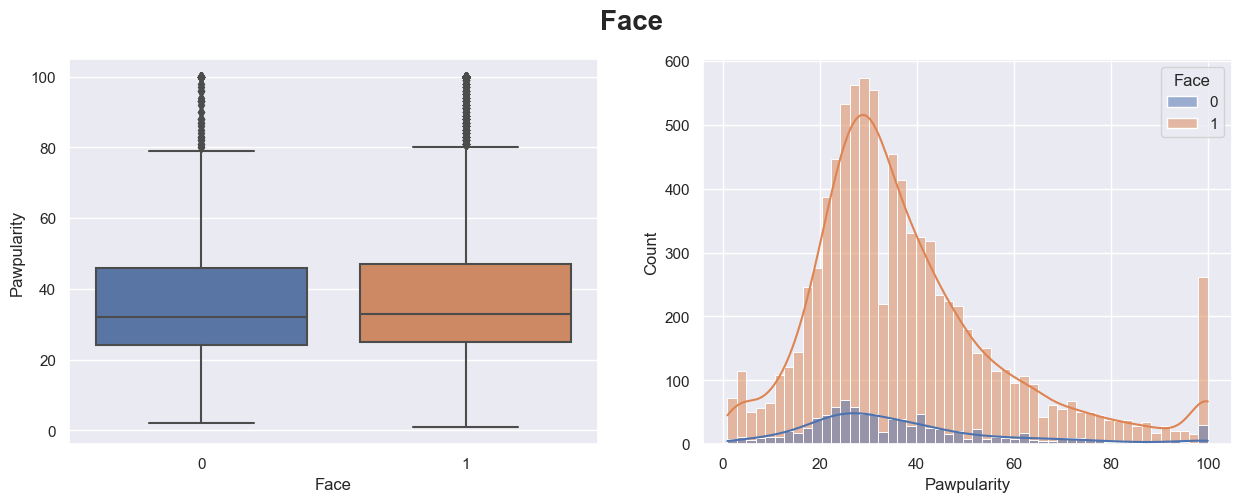

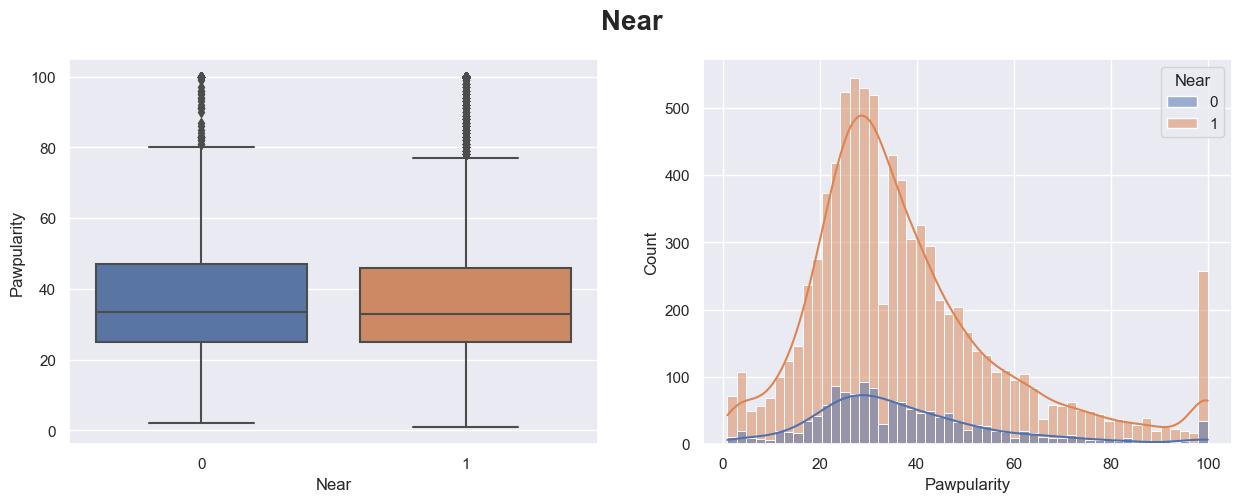

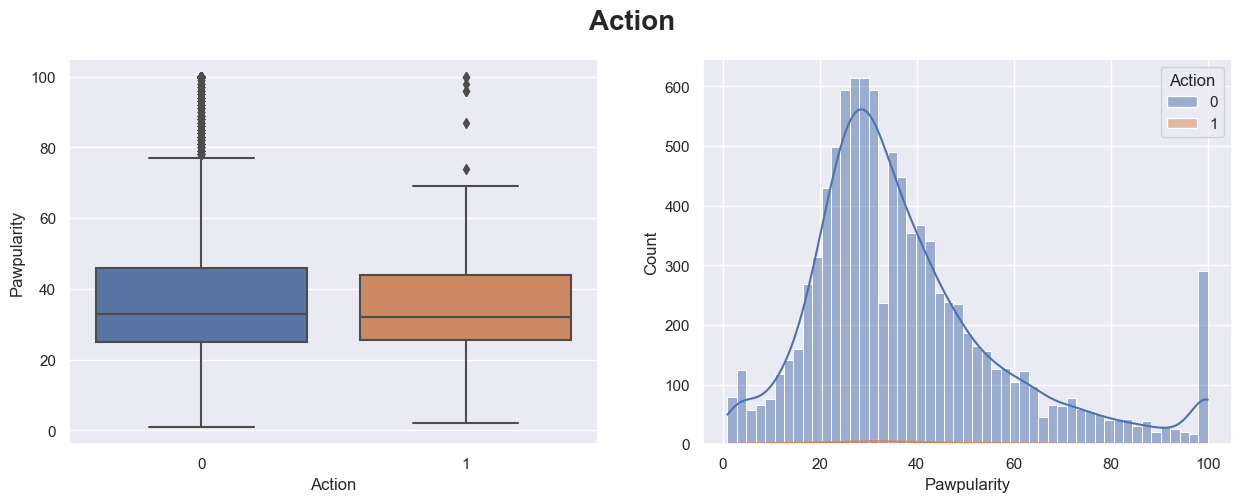

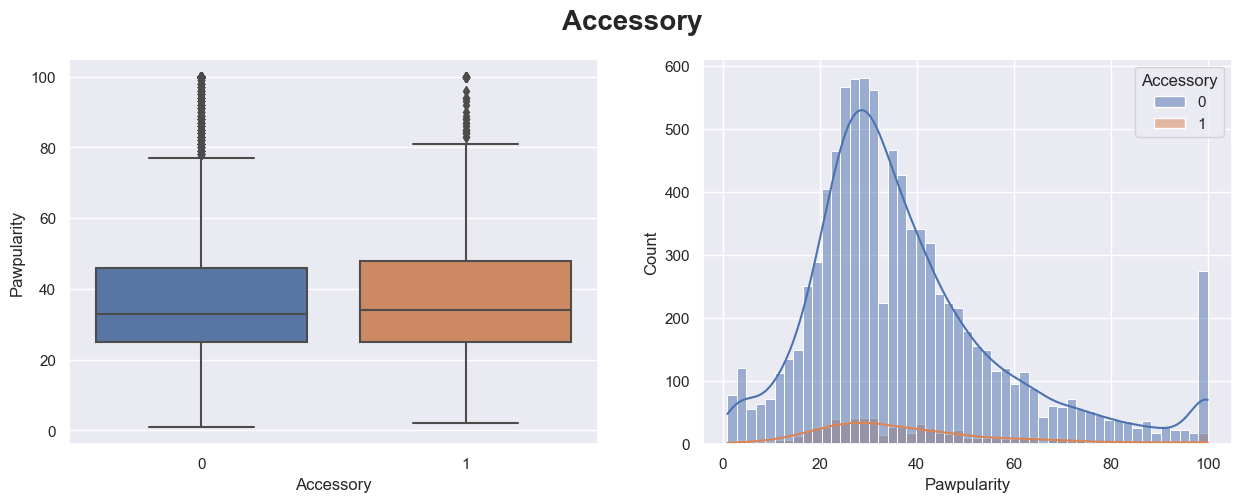

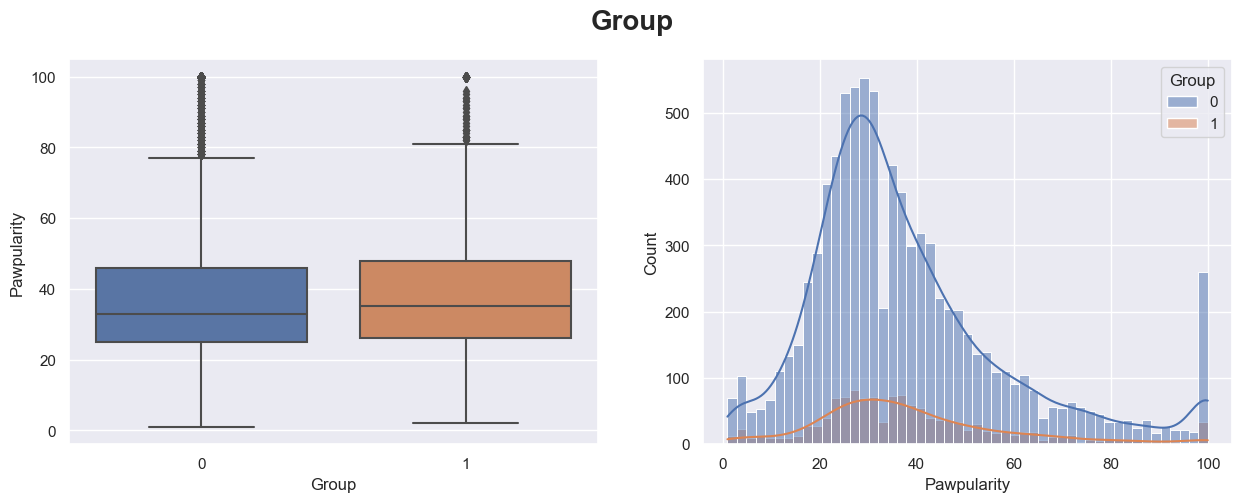

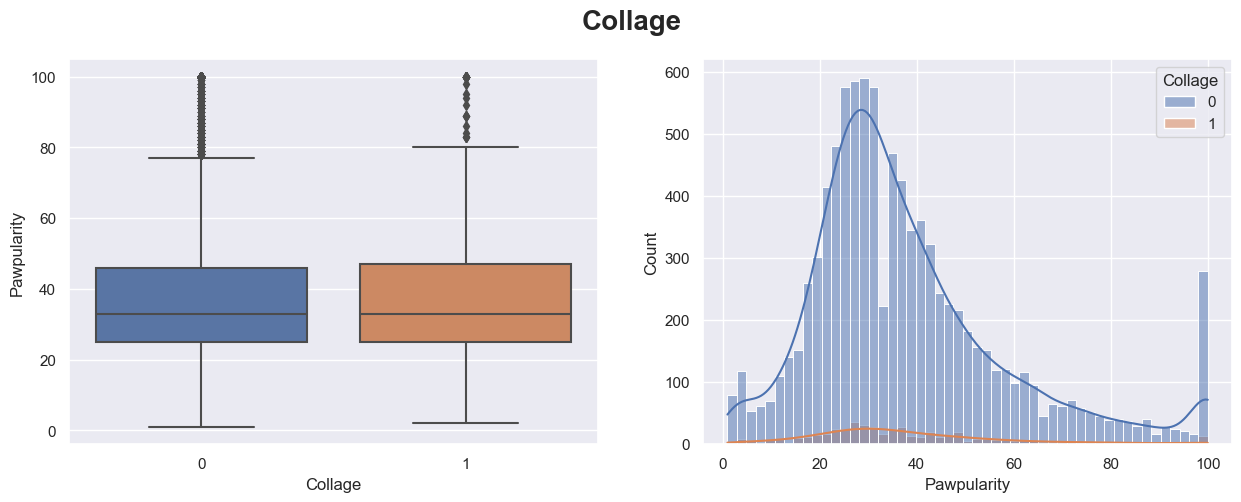

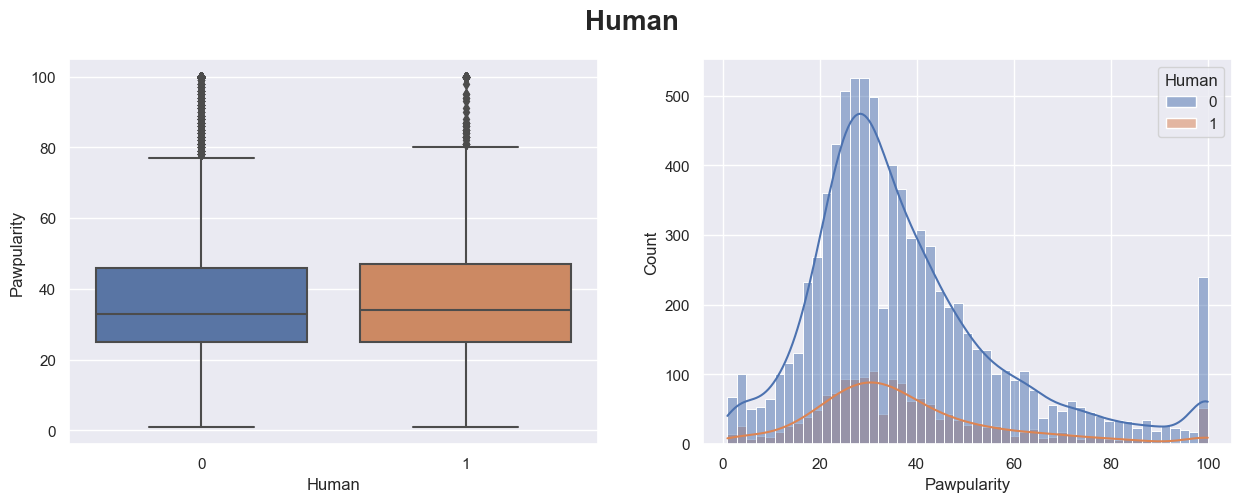

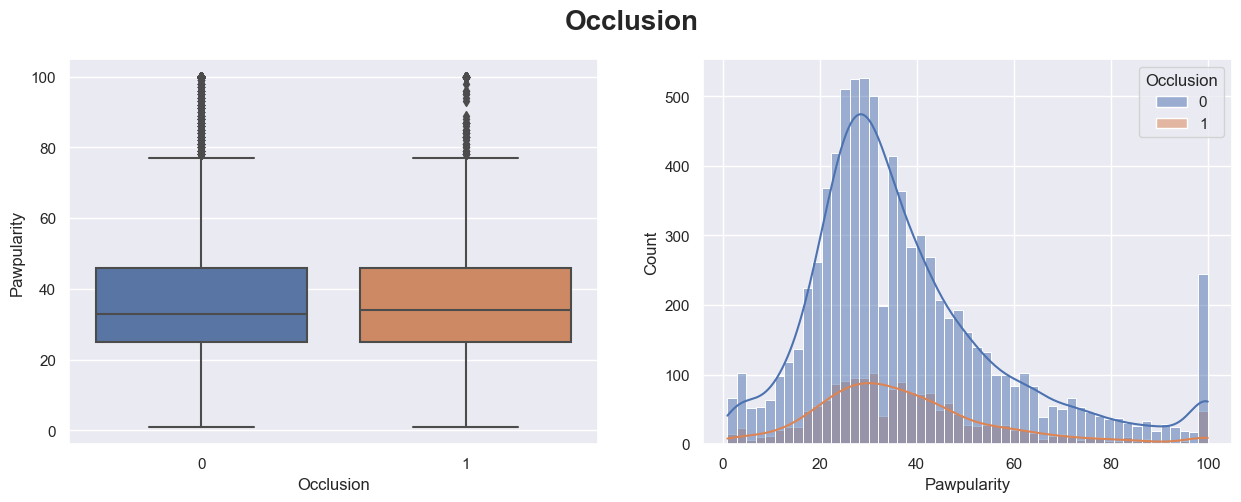

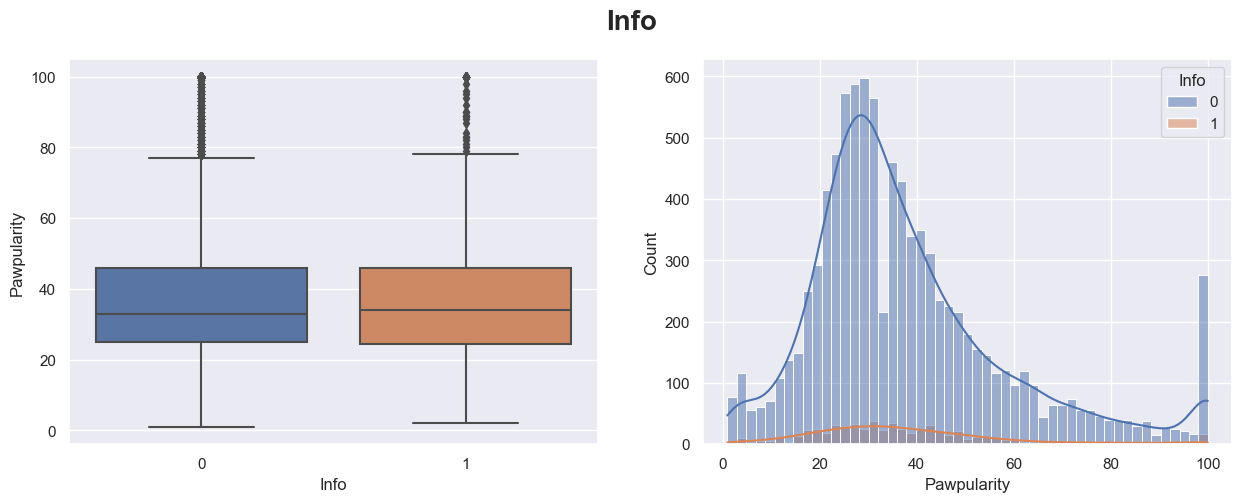

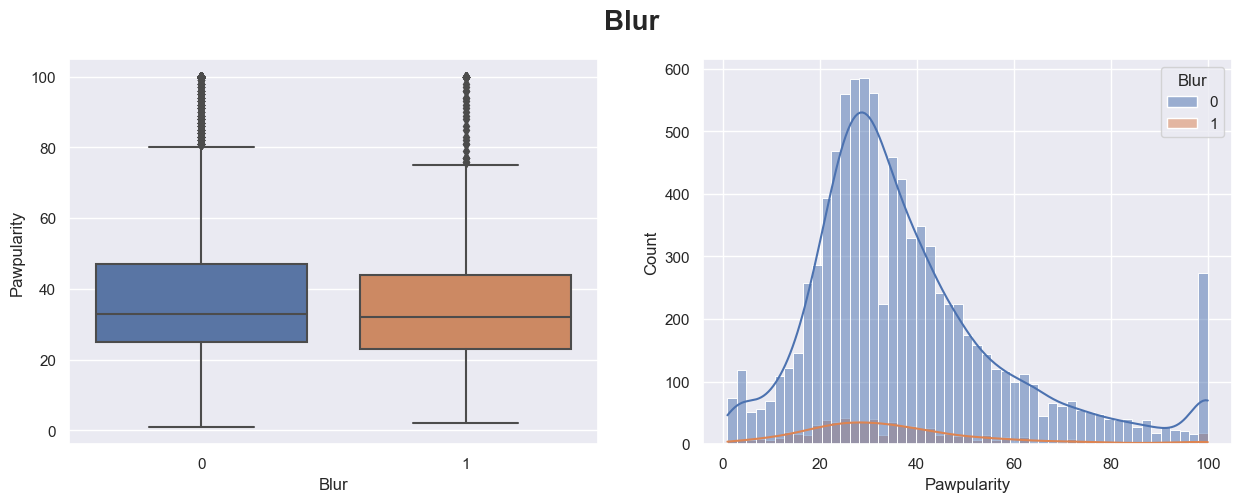

In [44]:
feature_variables = df.columns.values.tolist()

# for each of the feature variables, doesn't include Id and Pawpularity by using [1:-1]
for variable in feature_variables[1:-1]:
    fig, ax = plt.subplots(1,2)
    sns.boxplot(data=df, x=variable, y='Pawpularity', ax=ax[0])
    sns.histplot(df, x="Pawpularity", hue=variable, kde=True, ax=ax[1])
    plt.suptitle(variable, fontsize=20, fontweight='bold')
    fig.show()

We can see that for basically all the features, whether it is present or not makes a negligible difference towards the pawpularity score. Hence, we should worry about only the images when training our model

# Image Data

Now let us explore the images

Random photos

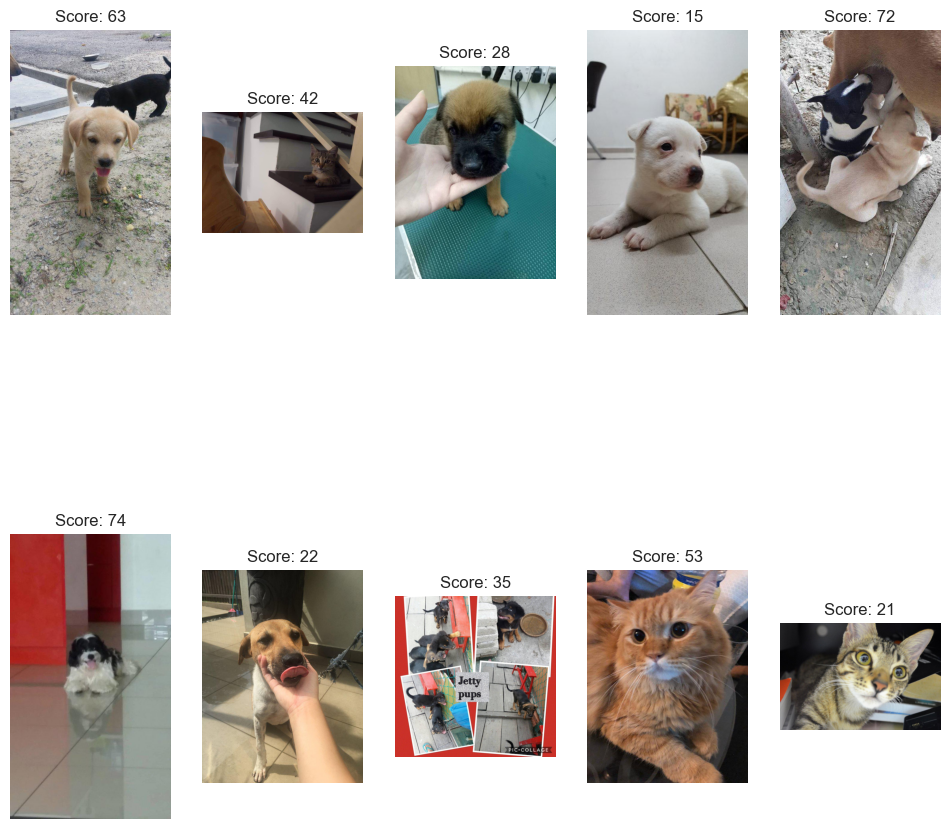

In [51]:
plt.figure(figsize=(12, 12))

for index, row in df.head(10).iterrows():
    photo_id = row['Id']
    score = row["Pawpularity"]
    img_file_path = os.path.join("data", "train", photo_id + ".jpg")

    plt.subplot(2, 5, index + 1)
    plt.imshow(plt.imread(img_file_path))
    plt.title("Score: " + str(score))
    plt.axis("off")

plt.show()

Worst photos

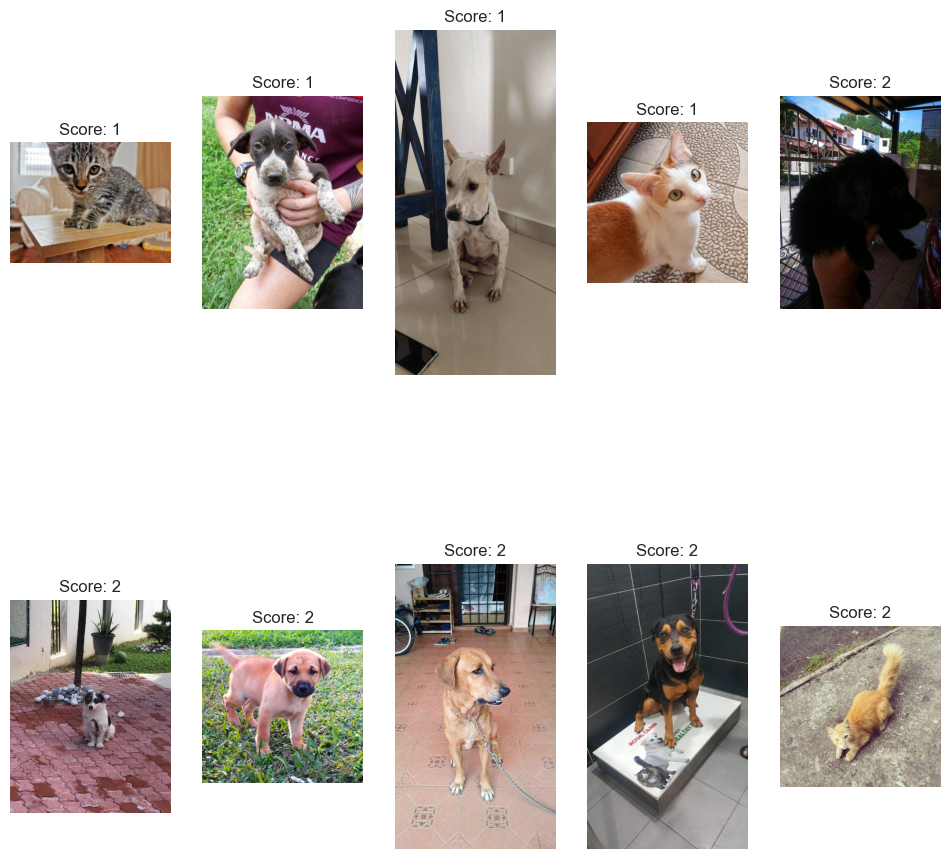

In [52]:
plt.figure(figsize=(12, 12))

for index, row in df.sort_values(by="Pawpularity", ascending=True, ignore_index=True).head(10).iterrows():
    photo_id = row['Id']
    score = row["Pawpularity"]
    img_file_path = os.path.join("data", "train", photo_id + ".jpg")

    plt.subplot(2, 5, index + 1)
    plt.imshow(plt.imread(img_file_path))
    plt.title("Score: " + str(score))
    plt.axis("off")

plt.show()

Best photos

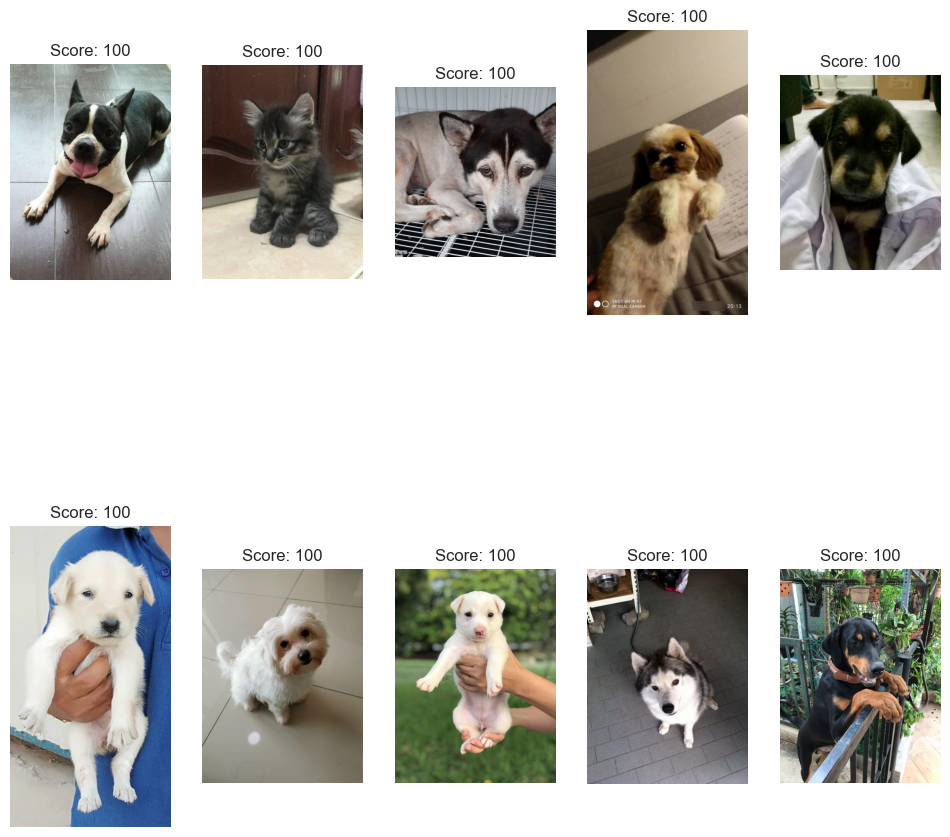

In [53]:
plt.figure(figsize=(12, 12))

for index, row in df.sort_values(by="Pawpularity", ascending=False, ignore_index=True).head(10).iterrows():
    photo_id = row['Id']
    score = row["Pawpularity"]
    img_file_path = os.path.join("data", "train", photo_id + ".jpg")

    plt.subplot(2, 5, index + 1)
    plt.imshow(plt.imread(img_file_path))
    plt.title("Score: " + str(score))
    plt.axis("off")

plt.show()

Median photos

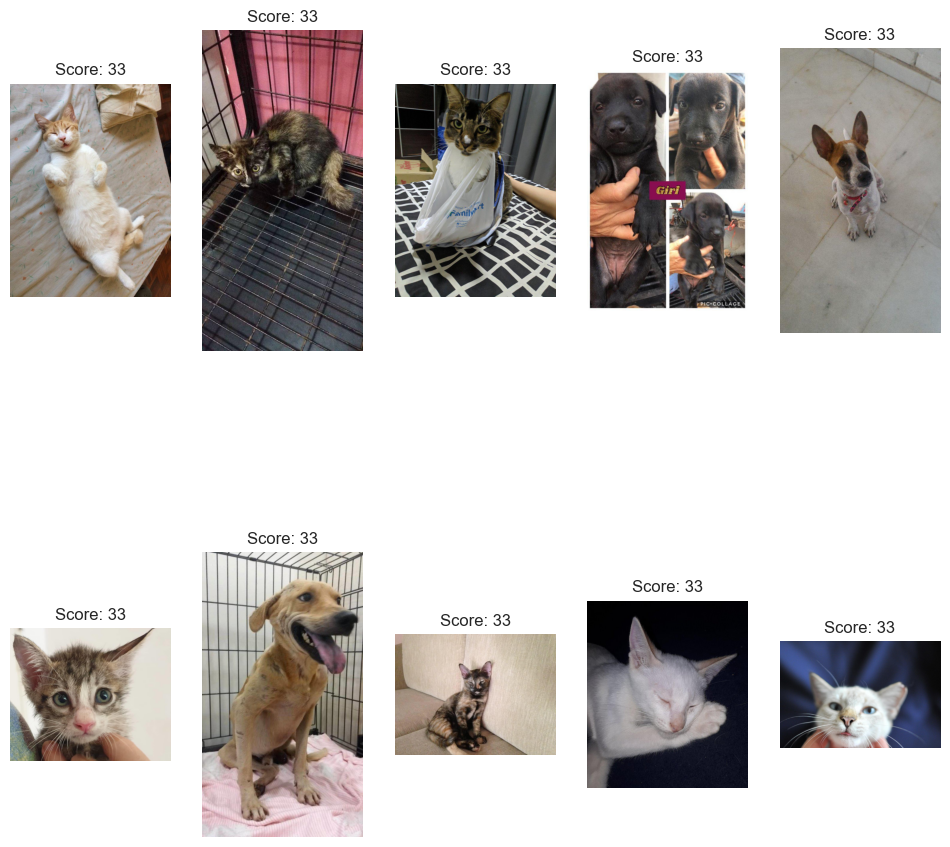

In [55]:
plt.figure(figsize=(12, 12))

for index, (_, row) in enumerate(df[df["Pawpularity"] == df["Pawpularity"].median()].head(10).iterrows()):
    photo_id = row['Id']
    score = row["Pawpularity"]
    img_file_path = os.path.join("data", "train", photo_id + ".jpg")

    plt.subplot(2, 5, index + 1)
    plt.imshow(plt.imread(img_file_path))
    plt.title("Score: " + str(score))
    plt.axis("off")

plt.show()

# Closing Remarks

The metadata has a negligible impact on the pawpularity score, which means that regular machine learning models may not work so well for this task. We might want to use some computer vision techniques to build a model using the images, and then train the model on the images